In [1]:
%run func_def.ipynb

**imports loaded.

> Pre-Processing func:
    get_striking_efficiency(name, date)
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_c

# <span style='color:green'> **[done]** </span> Exploratory Data Analysis

### <span style='color:green'> **[done]** </span> ufc_fighters_stats.csv exploration

In [2]:
loc = '../../web_scrapers/data/'
file1 = 'ufc_fighters_stats.csv'
df = pd.read_csv(loc+file1)
df.tail(3)

,name,wins,losses,draws,height,weight,reach,stance,dob,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
2387,Victoria Leonardo,9,6,0,"5'5""",125lbs.,"64""",Orthodox,"Feb16,1990",3.27,39%,4.70,46%,1.60,27%,71%,0.0,06-11-2023,05-20-2023,http://ufcstats.com/fighter-details/9dedfdd910...
2388,Themba Gorimbo,11,4,0,"6'1""",170lbs.,"77""",Orthodox,"Jan23,1991",1.80,59%,1.71,42%,3.47,50%,66%,0.0,06-11-2023,05-20-2023,http://ufcstats.com/fighter-details/40f3cb27fc...
2389,Takashi Sato,16,7,0,"5'10""",170lbs.,"73""",Southpaw,"Jun09,1990",2.21,41%,3.73,44%,0.76,37%,60%,0.0,06-11-2023,05-20-2023,http://ufcstats.com/fighter-details/8abac21874...


## Column's Legend:
****
* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)
* <span style='color:blue'> **TD Avg.** </span> - Average Takedowns Landed per 15 minutes
* <span style='color:blue'> **TD Acc.** </span> - Takedown Accuracy
* <span style='color:blue'> **TD Def.** </span> - Takedown Defense (the % of opponents TD attempts that did not land)
* <span style='color:blue'> **Sub. Avg.** </span> - Average Submissions Attempted per 15 minutes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2390 non-null   object 
 1   wins         2390 non-null   int64  
 2   losses       2390 non-null   int64  
 3   draws        2390 non-null   object 
 4   height       2390 non-null   object 
 5   weight       2390 non-null   object 
 6   reach        2390 non-null   object 
 7   stance       2302 non-null   object 
 8   dob          2390 non-null   object 
 9   slpm         2390 non-null   float64
 10  str_acc      2390 non-null   object 
 11  sapm         2390 non-null   float64
 12  str_def      2390 non-null   object 
 13  td_avg       2390 non-null   float64
 14  td_acc       2390 non-null   object 
 15  td_def       2390 non-null   object 
 16  sub_avg      2390 non-null   float64
 17  last_update  2390 non-null   object 
 18  last_match   2371 non-null   object 
 19  url   

### <span style='color:green'> **[done]** </span> height

In [4]:
for i in range(0,len(df['height'])):
    df.loc[i,'height'] = get_height(df.loc[i,'height']) 
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2390 non-null   object 
 1   wins         2390 non-null   int64  
 2   losses       2390 non-null   int64  
 3   draws        2390 non-null   object 
 4   height       2369 non-null   object 
 5   weight       2390 non-null   object 
 6   reach        2390 non-null   object 
 7   stance       2302 non-null   object 
 8   dob          2390 non-null   object 
 9   slpm         2390 non-null   float64
 10  str_acc      2390 non-null   object 
 11  sapm         2390 non-null   float64
 12  str_def      2390 non-null   object 
 13  td_avg       2390 non-null   float64
 14  td_acc       2390 non-null   object 
 15  td_def       2390 non-null   object 
 16  sub_avg      2390 non-null   float64
 17  last_update  2390 non-null   object 
 18  last_match   2371 non-null   object 
 19  url   

#### replacing null values with mean >

In [5]:
height_list = df['height'][df['height']!=None]
df.height = df.height.fillna(np.round(np.mean(height_list),2))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2390 non-null   object 
 1   wins         2390 non-null   int64  
 2   losses       2390 non-null   int64  
 3   draws        2390 non-null   object 
 4   height       2390 non-null   float64
 5   weight       2390 non-null   object 
 6   reach        2390 non-null   object 
 7   stance       2302 non-null   object 
 8   dob          2390 non-null   object 
 9   slpm         2390 non-null   float64
 10  str_acc      2390 non-null   object 
 11  sapm         2390 non-null   float64
 12  str_def      2390 non-null   object 
 13  td_avg       2390 non-null   float64
 14  td_acc       2390 non-null   object 
 15  td_def       2390 non-null   object 
 16  sub_avg      2390 non-null   float64
 17  last_update  2390 non-null   object 
 18  last_match   2371 non-null   object 
 19  url   

### <span style='color:green'> **[done]** </span> weight 

In [6]:
for i in range(0,len(df['weight'])):
    df.loc[i,'weight'] = get_weight(df.loc[i,'weight']) 
    
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2390 non-null   object 
 1   wins         2390 non-null   int64  
 2   losses       2390 non-null   int64  
 3   draws        2390 non-null   object 
 4   height       2390 non-null   float64
 5   weight       2372 non-null   object 
 6   reach        2390 non-null   object 
 7   stance       2302 non-null   object 
 8   dob          2390 non-null   object 
 9   slpm         2390 non-null   float64
 10  str_acc      2390 non-null   object 
 11  sapm         2390 non-null   float64
 12  str_def      2390 non-null   object 
 13  td_avg       2390 non-null   float64
 14  td_acc       2390 non-null   object 
 15  td_def       2390 non-null   object 
 16  sub_avg      2390 non-null   float64
 17  last_update  2390 non-null   object 
 18  last_match   2371 non-null   object 
 19  url   

#### drop fighters which weight is unknown> 

In [7]:
df = df[~df.weight.isna()].reset_index(drop=True)
df.tail(3)

,name,wins,losses,draws,height,weight,reach,stance,dob,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
2369,Victoria Leonardo,9,6,0,165.10,56.25,"64""",Orthodox,"Feb16,1990",3.27,39%,4.70,46%,1.60,27%,71%,0.0,06-11-2023,05-20-2023,http://ufcstats.com/fighter-details/9dedfdd910...
2370,Themba Gorimbo,11,4,0,185.42,76.5,"77""",Orthodox,"Jan23,1991",1.80,59%,1.71,42%,3.47,50%,66%,0.0,06-11-2023,05-20-2023,http://ufcstats.com/fighter-details/40f3cb27fc...
2371,Takashi Sato,16,7,0,177.80,76.5,"73""",Southpaw,"Jun09,1990",2.21,41%,3.73,44%,0.76,37%,60%,0.0,06-11-2023,05-20-2023,http://ufcstats.com/fighter-details/8abac21874...


### <span style='color:green'> **[done]** </span> Reach

In [8]:
df.reach.unique()

array(['70"', '75"', '63"', '68"', '78"', '71"', '62"', '76"', '72"',
       '74"', '69"', '64"', '65"', '73"', '82"', '67"', '77"', '61"',
       '80"', '66"', '79"', '84"', '--', '81"', '60"', '58"', '83"',
       '59"'], dtype=object)

In [9]:
for i in range(0,len(df['reach'])):
    df.loc[i,'reach'] = get_reach(df.loc[i,'reach']) 
    
df.head(3)   

,name,wins,losses,draws,height,weight,reach,stance,dob,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
0,Ryan Hall,9,2,0,177.80,65.25,177.8,Southpaw,"Feb22,1985",2.38,50%,1.33,65%,0.22,9%,0%,2.2,04-18-2023,12-11-2021,http://ufcstats.com/fighter-details/8866c6f509...
1,Maki Pitolo,13,9,0,177.80,83.25,190.5,Orthodox,"Nov24,1990",4.10,44%,3.93,55%,2.24,52%,50%,0.8,04-18-2023,12-04-2021,http://ufcstats.com/fighter-details/c549573c0d...
2,Mallory Martin,7,5,0,162.56,51.75,160.02,Orthodox,"Jan29,1994",4.42,48%,6.64,55%,2.28,43%,25%,0.3,04-18-2023,12-04-2021,http://ufcstats.com/fighter-details/19b7738321...


#### replacing null values with "standard reach" ( =mean(reach/height)*height ) >

<AxesSubplot:xlabel='height', ylabel='reach'>

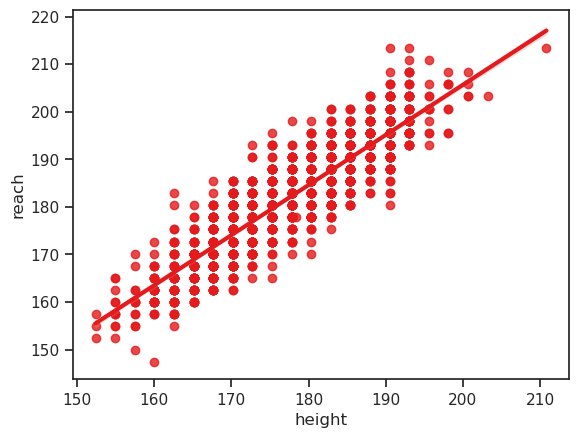

In [10]:
y = pd.to_numeric(df.reach[~df.reach.isna()])
x = pd.to_numeric(df.height[~df.reach.isna()])
sns.regplot(x=x, y=y)

In [11]:
null_indexs = df[df.reach.isna()].index

for i in null_indexs:
    df.loc[i, 'reach'] = get_std_reach(df.loc[i, 'reach'],df.loc[i,'height'], df['reach'], df['height']) 
    
print('Null changed: ' + str(len(null_indexs)))
df.info()   

Null changed: 639
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2372 non-null   object 
 1   wins         2372 non-null   int64  
 2   losses       2372 non-null   int64  
 3   draws        2372 non-null   object 
 4   height       2372 non-null   float64
 5   weight       2372 non-null   object 
 6   reach        2372 non-null   object 
 7   stance       2299 non-null   object 
 8   dob          2372 non-null   object 
 9   slpm         2372 non-null   float64
 10  str_acc      2372 non-null   object 
 11  sapm         2372 non-null   float64
 12  str_def      2372 non-null   object 
 13  td_avg       2372 non-null   float64
 14  td_acc       2372 non-null   object 
 15  td_def       2372 non-null   object 
 16  sub_avg      2372 non-null   float64
 17  last_update  2372 non-null   object 
 18  last_match   2353 non-null   o

### <span style='color:green'> **[done]** </span> stance

In [12]:
df.stance.unique()

array(['Southpaw', 'Orthodox', nan, 'Switch', 'OpenStance', 'Sideways'],
      dtype=object)

In [13]:
null_indexs = df[df.stance.isna()].index

for i in null_indexs:
    df.loc[i, 'stance'] = 'Orthodox' 
    
print('Null changed: ' + str(len(null_indexs)))
print(df.stance.unique())
df.info()   

Null changed: 73
['Southpaw' 'Orthodox' 'Switch' 'OpenStance' 'Sideways']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2372 non-null   object 
 1   wins         2372 non-null   int64  
 2   losses       2372 non-null   int64  
 3   draws        2372 non-null   object 
 4   height       2372 non-null   float64
 5   weight       2372 non-null   object 
 6   reach        2372 non-null   object 
 7   stance       2372 non-null   object 
 8   dob          2372 non-null   object 
 9   slpm         2372 non-null   float64
 10  str_acc      2372 non-null   object 
 11  sapm         2372 non-null   float64
 12  str_def      2372 non-null   object 
 13  td_avg       2372 non-null   float64
 14  td_acc       2372 non-null   object 
 15  td_def       2372 non-null   object 
 16  sub_avg      2372 non-null   float64
 17  last_update  237

### <span style='color:green'> **[done]** </span> Age

In [14]:
df = df.rename(columns = {'dob':'age'})
print(df.age.unique())
df.head(0)

['Feb22,1985' 'Nov24,1990' 'Jan29,1994' ... 'Feb03,1997' 'Feb16,1990'
 'Jun09,1990']


,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url


In [15]:
for i in range(0,len(df['age'])):
    
    if df.loc[i, 'age'] != None:
        df.loc[i, 'age'] = get_age(df.loc[i, 'age']) 
    
df.age.unique()  

array([38, 33, 29, 37, 36, 34, 42, 31, 30, 28, 32, 35, 40, 45, 27, 46, 39,
       44, 43, 41, 48, 47, 49, 26, 53, 51, 50, 52, None, 54, 60, 55, 56,
       59, 57, 58, 62, 65, 80, 63, 19, 25, 23, 24, 21, 22], dtype=object)

#### replacing null with standard age >

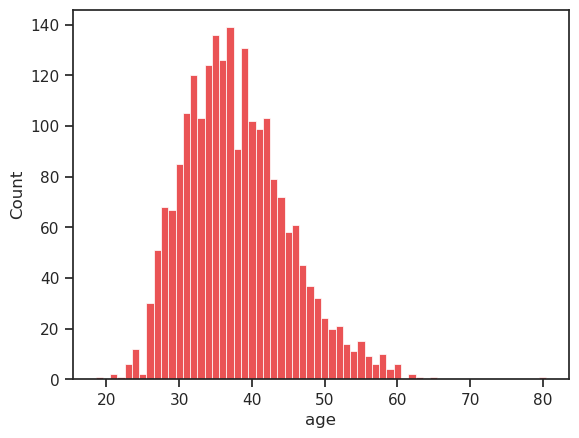

In [16]:
ax = sns.histplot(x=df["age"])

In [17]:
null_indexs = df[df.age.isna()].index
for i in null_indexs:
    df.loc[i, 'age'] = get_std_age(item=df.loc[i,'age'], age_list=df.age)

df.age.unique()    

array([38, 33, 29, 37, 36, 34, 42, 31, 30, 28, 32, 35, 40, 45, 27, 46, 39,
       44, 43, 41, 48, 47, 49, 26, 53, 51, 50, 52, 37.87, 54, 60, 55, 56,
       59, 57, 58, 62, 65, 80, 63, 19, 25, 23, 24, 21, 22], dtype=object)

### <span style='color:green'> **[done]** </span> statistics % pre-processing

In [18]:
df.head(3)

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
0,Ryan Hall,9,2,0,177.80,65.25,177.8,Southpaw,38,2.38,50%,1.33,65%,0.22,9%,0%,2.2,04-18-2023,12-11-2021,http://ufcstats.com/fighter-details/8866c6f509...
1,Maki Pitolo,13,9,0,177.80,83.25,190.5,Orthodox,33,4.10,44%,3.93,55%,2.24,52%,50%,0.8,04-18-2023,12-04-2021,http://ufcstats.com/fighter-details/c549573c0d...
2,Mallory Martin,7,5,0,162.56,51.75,160.02,Orthodox,29,4.42,48%,6.64,55%,2.28,43%,25%,0.3,04-18-2023,12-04-2021,http://ufcstats.com/fighter-details/19b7738321...


In [19]:
for column in ['str_acc','str_def','td_acc','td_def']:
    
    for i in range(0,len(df)):

        item = str(df.loc[i,column])
        df.loc[i,column] = float(item[0:item.find('%')])/100

df.head(3)

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
0,Ryan Hall,9,2,0,177.80,65.25,177.8,Southpaw,38,2.38,0.5,1.33,0.65,0.22,0.09,0.0,2.2,04-18-2023,12-11-2021,http://ufcstats.com/fighter-details/8866c6f509...
1,Maki Pitolo,13,9,0,177.80,83.25,190.5,Orthodox,33,4.10,0.44,3.93,0.55,2.24,0.52,0.5,0.8,04-18-2023,12-04-2021,http://ufcstats.com/fighter-details/c549573c0d...
2,Mallory Martin,7,5,0,162.56,51.75,160.02,Orthodox,29,4.42,0.48,6.64,0.55,2.28,0.43,0.25,0.3,04-18-2023,12-04-2021,http://ufcstats.com/fighter-details/19b7738321...


### <span style='color:green'> **[done]** </span> losses

In [20]:
null_indexs = df[df.losses.isna()].index
for i in null_indexs:
    df.loc[i,'losses'] = int(0)
    
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2372 non-null   object 
 1   wins         2372 non-null   int64  
 2   losses       2372 non-null   int64  
 3   draws        2372 non-null   object 
 4   height       2372 non-null   float64
 5   weight       2372 non-null   object 
 6   reach        2372 non-null   object 
 7   stance       2372 non-null   object 
 8   age          2372 non-null   object 
 9   slpm         2372 non-null   float64
 10  str_acc      2372 non-null   object 
 11  sapm         2372 non-null   float64
 12  str_def      2372 non-null   object 
 13  td_avg       2372 non-null   float64
 14  td_acc       2372 non-null   object 
 15  td_def       2372 non-null   object 
 16  sub_avg      2372 non-null   float64
 17  last_update  2372 non-null   object 
 18  last_match   2353 non-null   object 
 19  url   

In [21]:
stat_df = df
stat_df.head(3)

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
0,Ryan Hall,9,2,0,177.80,65.25,177.8,Southpaw,38,2.38,0.5,1.33,0.65,0.22,0.09,0.0,2.2,04-18-2023,12-11-2021,http://ufcstats.com/fighter-details/8866c6f509...
1,Maki Pitolo,13,9,0,177.80,83.25,190.5,Orthodox,33,4.10,0.44,3.93,0.55,2.24,0.52,0.5,0.8,04-18-2023,12-04-2021,http://ufcstats.com/fighter-details/c549573c0d...
2,Mallory Martin,7,5,0,162.56,51.75,160.02,Orthodox,29,4.42,0.48,6.64,0.55,2.28,0.43,0.25,0.3,04-18-2023,12-04-2021,http://ufcstats.com/fighter-details/19b7738321...


## <span style='color:green'> **[done]** </span> ufc_fights_stats.csv exploration

In [22]:
file = 'ufc_matches_stats.csv'
df = pd.read_csv(loc+file)
df.tail(3)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,event_url
6514,win,Muhammad Naimov,Jamie Mullarkey,1,0,28,39,0,3,0,0,Lightweight,KO/TKO,Punch,2,2:59,06-03-2023,http://ufcstats.com/event-details/7abe471b6172...
6515,win,Elise Reed,Jinh Yu Frey,0,0,53,28,0,3,0,0,Women's Strawweight,U-DEC,NaN,3,5:00,06-03-2023,http://ufcstats.com/event-details/7abe471b6172...
6516,win,Da'Mon Blackshear,Luan Lacerda,0,0,66,28,1,1,0,1,Bantamweight,KO/TKO,Punches,2,3:54,06-03-2023,http://ufcstats.com/event-details/7abe471b6172...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517 entries, 0 to 6516
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   result        6517 non-null   object
 1   fighter       6517 non-null   object
 2   opponent      6517 non-null   object
 3   f_kd          6517 non-null   object
 4   o_kd          6517 non-null   object
 5   f_str         6517 non-null   object
 6   o_str         6517 non-null   object
 7   f_td          6517 non-null   object
 8   o_td          6517 non-null   object
 9   f_sub         6517 non-null   object
 10  o_sub         6517 non-null   object
 11  weight_class  6517 non-null   object
 12  method        6517 non-null   object
 13  type          3312 non-null   object
 14  round         6517 non-null   int64 
 15  time          6517 non-null   object
 16  date          6517 non-null   object
 17  event_url     6517 non-null   object
dtypes: int64(1), object(17)
memory usage: 916.6+ KB


In [24]:
for column in ['f_kd','o_kd','f_str','o_str','f_td','o_td','f_sub','o_sub']:
    df[column] = df[column].replace('--',0)

### <span style='color:green'> **[done]** </span> type

In [25]:
null_indexs = df[df.type.isna()].index
for i in null_indexs:
    if df.loc[i,'method'] == 'U-DEC':
        df.loc[i,'type'] = 'Unanimous'
    elif df.loc[i,'method'] == 'S-DEC':
        df.loc[i,'type'] = 'Split'
    elif df.loc[i,'method'] == 'M-DEC':
        df.loc[i,'type'] = 'Majority'
    else:
        df.loc[i,'type'] = 'Other'
        
print(df.type.unique())        
df.info()   

['Unanimous' 'Knee' 'Punches' 'Rear Naked Choke' 'Armbar' 'Punch' 'Split'
 'Guillotine Choke' 'Elbows' 'Majority' 'Neck Crank' 'Other'
 'Triangle Choke' 'Inverted Triangle' 'Arm Triangle' 'Knees' 'Kneebar'
 'Flying Knee' 'Kick' 'Kimura' "D'Arce Choke" 'Triangle Armbar'
 'Von Flue Choke' 'Spinning Back Elbow' 'Spinning Back Fist' 'Elbow'
 'Keylock' 'Scarf Hold' 'Straight Armbar' 'Anaconda Choke' 'Heel Hook'
 'Ankle Lock' 'Slam' 'Forearm Choke' 'Injury' 'Spinning Back Kick'
 'Twister' 'Peruvian Necktie' 'Schultz Front Headlock' 'Bulldog Choke'
 'Suloev Stretch' 'Ezekiel Choke' 'Omoplata' 'Calf Slicer'
 'North-South Choke' 'Kicks' 'Pace/Pillory Choke' 'Other - Lock'
 'Toe Hold' 'Shoulder Choke' 'Headbutts' 'Headbutt' 'Gi Choke'
 'Other - Choke']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517 entries, 0 to 6516
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   result        6517 non-null   object
 1   fighter  

### <span style='color:green'> **[done]** </span> date

In [26]:
df.date = pd.to_datetime(df.date, format='%m-%d-%Y')
df.head(3)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,event_url
0,win,Max Holloway,Arnold Allen,0,0,147,76,0,0,0,0,Featherweight,U-DEC,Unanimous,5,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...
1,win,Edson Barboza,Billy Quarantillo,1,0,21,19,0,0,0,0,Featherweight,KO/TKO,Knee,1,2:37,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...
2,win,Azamat Murzakanov,Dustin Jacoby,1,0,67,64,1,1,0,0,Light Heavyweight,U-DEC,Unanimous,3,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...


### <span style='color:green'> **[done]** </span> drop 'draw' & 'nc' rows

In [27]:
df.result.unique()

array(['win', 'draw', 'nc'], dtype=object)

In [28]:
df = df[df.result == 'win'].reset_index(drop=True)
df.tail(3)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,event_url
6404,win,Muhammad Naimov,Jamie Mullarkey,1,0,28,39,0,3,0,0,Lightweight,KO/TKO,Punch,2,2:59,2023-06-03,http://ufcstats.com/event-details/7abe471b6172...
6405,win,Elise Reed,Jinh Yu Frey,0,0,53,28,0,3,0,0,Women's Strawweight,U-DEC,Unanimous,3,5:00,2023-06-03,http://ufcstats.com/event-details/7abe471b6172...
6406,win,Da'Mon Blackshear,Luan Lacerda,0,0,66,28,1,1,0,1,Bantamweight,KO/TKO,Punches,2,3:54,2023-06-03,http://ufcstats.com/event-details/7abe471b6172...


### <span style='color:green'> **[done]** </span> feature Win % column

In [29]:
df['f_win_perc'] = None
df['o_win_perc'] = None

i = 0
for fighter, opponent, date in tqdm(zip(df['fighter'], df['opponent'], df['date'])):
    #print('%d%% Completed' %(round((i/len(df))*100,2)), end ='\r')
    df.loc[i, 'f_win_perc'] = round(get_win_prob(name=fighter, date=date, df=df),2)
    df.loc[i, 'o_win_perc'] = round(get_win_prob(name=opponent, date=date, df=df),2)    
    i += 1

#print('100% Completed', end ='\r')    
df.head(3)

6407it [00:21, 304.35it/s]


,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,event_url,f_win_perc,o_win_perc
0,win,Max Holloway,Arnold Allen,0,0,147,76,0,0,0,0,Featherweight,U-DEC,Unanimous,5,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,0.73,1.0
1,win,Edson Barboza,Billy Quarantillo,1,0,21,19,0,0,0,0,Featherweight,KO/TKO,Knee,1,2:37,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,0.59,0.71
2,win,Azamat Murzakanov,Dustin Jacoby,1,0,67,64,1,1,0,0,Light Heavyweight,U-DEC,Unanimous,3,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,1.0,0.8


### <span style='color:green'> **[done]** </span> feature striking effect column = power of each shot = KD/all strikes

In [30]:
df['f_str_efc'] = None
df['o_str_efc'] = None

for i in tqdm(range(len(df))):
    #print(f"{df.loc[i,'fighter']} vs {df.loc[i,'opponent']}: {get_striking_efficiency(name=df.loc[i,'fighter'], date=df.loc[i,'date'])}:{get_striking_efficiency(name=df.loc[i,'opponent'], date=df.loc[i,'date'])}")
    df.loc[i,'f_str_efc'] = get_striking_efficiency(name=df.loc[i,'fighter'], date=df.loc[i,'date'])
    df.loc[i,'o_str_efc'] = get_striking_efficiency(name=df.loc[i,'opponent'], date=df.loc[i,'date'])

df.head(3)    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6407/6407 [00:29<00:00, 217.18it/s]


,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,event_url,f_win_perc,o_win_perc,f_str_efc,o_str_efc
0,win,Max Holloway,Arnold Allen,0,0,147,76,0,0,0,0,Featherweight,U-DEC,Unanimous,5,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,0.73,1.0,0.00269,0.00723
1,win,Edson Barboza,Billy Quarantillo,1,0,21,19,0,0,0,0,Featherweight,KO/TKO,Knee,1,2:37,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,0.59,0.71,0.01128,0.00314
2,win,Azamat Murzakanov,Dustin Jacoby,1,0,67,64,1,1,0,0,Light Heavyweight,U-DEC,Unanimous,3,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,1.0,0.8,0.01266,0.00867


### <span style='color:green'> **[done]** </span> feature Win/Lose streak column

In [31]:
df['f_win_strk'] = None
df['o_win_strk'] = None
df['f_lose_strk'] = None
df['o_lose_strk'] = None

for i in tqdm(range(len(df))):
    df.loc[i,'f_win_strk'] = get_win_streak(name=df.loc[i,'fighter'],date=df.loc[i,'date'],df=df)
    df.loc[i,'o_win_strk'] = get_win_streak(name=df.loc[i,'opponent'],date=df.loc[i,'date'],df=df)
    df.loc[i,'f_lose_strk'] = get_lose_streak(name=df.loc[i,'fighter'],date=df.loc[i,'date'],df=df)
    df.loc[i,'o_lose_strk'] = get_lose_streak(name=df.loc[i,'opponent'],date=df.loc[i,'date'],df=df)
    
df.head(3)    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6407/6407 [00:54<00:00, 118.22it/s]


,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,event_url,f_win_perc,o_win_perc,f_str_efc,o_str_efc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,win,Max Holloway,Arnold Allen,0,0,147,76,0,0,0,0,Featherweight,U-DEC,Unanimous,5,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,0.73,1.0,0.00269,0.00723,0,10,1,0
1,win,Edson Barboza,Billy Quarantillo,1,0,21,19,0,0,0,0,Featherweight,KO/TKO,Knee,1,2:37,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,0.59,0.71,0.01128,0.00314,0,1,2,0
2,win,Azamat Murzakanov,Dustin Jacoby,1,0,67,64,1,1,0,0,Light Heavyweight,U-DEC,Unanimous,3,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,1.0,0.8,0.01266,0.00867,1,0,0,1


In [32]:
main_df = df

# <span style='color:green'> **[done]** </span> Merge data frames
extracting data from fighters.csv(=stats_df) and add it to fights.csv(=main_df)

In [33]:
stat_df = stat_df.drop(['last_update','url'], axis=1)
stat_df.head(3)

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_match
0,Ryan Hall,9,2,0,177.80,65.25,177.8,Southpaw,38,2.38,0.5,1.33,0.65,0.22,0.09,0.0,2.2,12-11-2021
1,Maki Pitolo,13,9,0,177.80,83.25,190.5,Orthodox,33,4.10,0.44,3.93,0.55,2.24,0.52,0.5,0.8,12-04-2021
2,Mallory Martin,7,5,0,162.56,51.75,160.02,Orthodox,29,4.42,0.48,6.64,0.55,2.28,0.43,0.25,0.3,12-04-2021


In [34]:
main_df = main_df.drop(['event_url'], axis=1)
main_df.head(3)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,f_win_perc,o_win_perc,f_str_efc,o_str_efc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,win,Max Holloway,Arnold Allen,0,0,147,76,0,0,0,0,Featherweight,U-DEC,Unanimous,5,5:00,2023-04-15,0.73,1.0,0.00269,0.00723,0,10,1,0
1,win,Edson Barboza,Billy Quarantillo,1,0,21,19,0,0,0,0,Featherweight,KO/TKO,Knee,1,2:37,2023-04-15,0.59,0.71,0.01128,0.00314,0,1,2,0
2,win,Azamat Murzakanov,Dustin Jacoby,1,0,67,64,1,1,0,0,Light Heavyweight,U-DEC,Unanimous,3,5:00,2023-04-15,1.0,0.8,0.01266,0.00867,1,0,0,1


In [35]:
df = main_df

### <span style='color:green'> **[done]** </span> add new empty columns:

In [36]:
original_columns_list = main_df.columns

f_column_list = ['f_' + column for column in stat_df.columns[1:]]
o_column_list = ['o_' + column for column in stat_df.columns[1:]]
new_column_list = f_column_list + o_column_list

for column in new_column_list:
    main_df[column] = None

main_df.columns 

Index(['result', 'fighter', 'opponent', 'f_kd', 'o_kd', 'f_str', 'o_str',
       'f_td', 'o_td', 'f_sub', 'o_sub', 'weight_class', 'method', 'type',
       'round', 'time', 'date', 'f_win_perc', 'o_win_perc', 'f_str_efc',
       'o_str_efc', 'f_win_strk', 'o_win_strk', 'f_lose_strk', 'o_lose_strk',
       'f_wins', 'f_losses', 'f_draws', 'f_height', 'f_weight', 'f_reach',
       'f_stance', 'f_age', 'f_slpm', 'f_str_acc', 'f_sapm', 'f_str_def',
       'f_td_avg', 'f_td_acc', 'f_td_def', 'f_sub_avg', 'f_last_match',
       'o_wins', 'o_losses', 'o_draws', 'o_height', 'o_weight', 'o_reach',
       'o_stance', 'o_age', 'o_slpm', 'o_str_acc', 'o_sapm', 'o_str_def',
       'o_td_avg', 'o_td_acc', 'o_td_def', 'o_sub_avg', 'o_last_match'],
      dtype='object')

In [37]:
main_df.head(2)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,f_win_perc,o_win_perc,f_str_efc,o_str_efc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str_acc,f_sapm,f_str_def,f_td_avg,f_td_acc,f_td_def,f_sub_avg,f_last_match,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str_acc,o_sapm,o_str_def,o_td_avg,o_td_acc,o_td_def,o_sub_avg,o_last_match
0,win,Max Holloway,Arnold Allen,0,0,147,76,0,0,0,0,Featherweight,U-DEC,Unanimous,5,5:00,2023-04-15,0.73,1.0,0.00269,0.00723,0,10,1,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,win,Edson Barboza,Billy Quarantillo,1,0,21,19,0,0,0,0,Featherweight,KO/TKO,Knee,1,2:37,2023-04-15,0.59,0.71,0.01128,0.00314,0,1,2,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


### <span style='color:green'> **[done]** </span> add data to new stats columns:

In [38]:
no_stats_indexes = []

for i in tqdm(range(len(main_df))):
    fighter = main_df.loc[i,'fighter']
    opponent = main_df.loc[i,'opponent']
    event_data = main_df.loc[i,original_columns_list]
    
    try:
        additional_stats = pd.concat([get_fighter_stats(name=fighter, data=stat_df ),get_fighter_stats(name=opponent, data=stat_df)])
    except:
        no_stats_indexes.append(i)
        continue
    
    main_df.iloc[i] = pd.concat([event_data,additional_stats])
    
main_df.tail(3)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6407/6407 [01:30<00:00, 70.83it/s]


,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,f_win_perc,o_win_perc,f_str_efc,o_str_efc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str_acc,f_sapm,f_str_def,f_td_avg,f_td_acc,f_td_def,f_sub_avg,f_last_match,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str_acc,o_sapm,o_str_def,o_td_avg,o_td_acc,o_td_def,o_sub_avg,o_last_match
6404,win,Muhammad Naimov,Jamie Mullarkey,1,0,28,39,0,3,0,0,Lightweight,KO/TKO,Punch,2,2:59,2023-06-03,0,0.57,0,0.00651,0,2,0,0,9,2,0,175.26,69.75,177.8,Orthodox,29,3.48,0.4,5.53,0.44,0.0,0.0,0.5,0.0,06-03-2023,16,6,0,182.88,69.75,187.96,Orthodox,29,4.2,0.46,4.2,0.54,2.91,0.35,0.75,0.2,06-03-2023
6405,win,Elise Reed,Jinh Yu Frey,0,0,53,28,0,3,0,0,Women's Strawweight,U-DEC,Unanimous,3,5:00,2023-06-03,0.5,0.4,0.00758,0.0,0,0,1,1,7,3,0,160.02,51.75,160.02,Orthodox,31,2.95,0.5,3.14,0.53,0.66,0.75,0.5,0.0,06-03-2023,11,9,0,160.02,51.75,165.1,Southpaw,38,2.95,0.42,4.11,0.52,1.02,0.37,0.89,0.3,06-03-2023
6406,win,Da'Mon Blackshear,Luan Lacerda,0,0,66,28,1,1,0,1,Bantamweight,KO/TKO,Punches,2,3:54,2023-06-03,0,0,0.0,0.0,0,0,1,1,13,5,1,177.8,60.75,182.88,Switch,29,3.57,0.43,3.83,0.51,1.16,0.23,0.54,0.8,06-03-2023,12,3,0,170.18,60.75,180.34,Orthodox,30,4.52,0.44,7.07,0.47,1.26,0.25,0.75,0.6,06-03-2023


In [39]:
# drop matches without additional statistics
main_df = main_df[~main_df.index.isin(no_stats_indexes)].reset_index(drop=True)
main_df.tail(3)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,f_win_perc,o_win_perc,f_str_efc,o_str_efc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str_acc,f_sapm,f_str_def,f_td_avg,f_td_acc,f_td_def,f_sub_avg,f_last_match,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str_acc,o_sapm,o_str_def,o_td_avg,o_td_acc,o_td_def,o_sub_avg,o_last_match
6391,win,Muhammad Naimov,Jamie Mullarkey,1,0,28,39,0,3,0,0,Lightweight,KO/TKO,Punch,2,2:59,2023-06-03,0,0.57,0,0.00651,0,2,0,0,9,2,0,175.26,69.75,177.8,Orthodox,29,3.48,0.4,5.53,0.44,0.0,0.0,0.5,0.0,06-03-2023,16,6,0,182.88,69.75,187.96,Orthodox,29,4.2,0.46,4.2,0.54,2.91,0.35,0.75,0.2,06-03-2023
6392,win,Elise Reed,Jinh Yu Frey,0,0,53,28,0,3,0,0,Women's Strawweight,U-DEC,Unanimous,3,5:00,2023-06-03,0.5,0.4,0.00758,0.0,0,0,1,1,7,3,0,160.02,51.75,160.02,Orthodox,31,2.95,0.5,3.14,0.53,0.66,0.75,0.5,0.0,06-03-2023,11,9,0,160.02,51.75,165.1,Southpaw,38,2.95,0.42,4.11,0.52,1.02,0.37,0.89,0.3,06-03-2023
6393,win,Da'Mon Blackshear,Luan Lacerda,0,0,66,28,1,1,0,1,Bantamweight,KO/TKO,Punches,2,3:54,2023-06-03,0,0,0.0,0.0,0,0,1,1,13,5,1,177.8,60.75,182.88,Switch,29,3.57,0.43,3.83,0.51,1.16,0.23,0.54,0.8,06-03-2023,12,3,0,170.18,60.75,180.34,Orthodox,30,4.52,0.44,7.07,0.47,1.26,0.25,0.75,0.6,06-03-2023


### <span style='color:green'> **[done]** </span> save to file

In [40]:
try:
    main_df.to_csv('../data/data_pre_processed.csv', index=0)
    print('../data/data_pre_processed.csv saved.')
except:
    print('error saving ../data/data_pre_processed.csv - might be file in use.')

../data/data_pre_processed.csv saved.
